<a href="https://colab.research.google.com/github/Jlokkerbol/masterclass/blob/main/Optimizing_different_metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Optimizing different metrics

This notebook shows how to optimize your machine learning models over different metrics, both metrics that are built-in options in caret, as well as user-defined metrics.

We use the BostonHousing dataset and transform the outcome measure (median value of the houses in Boston) into a binary outcome measure, as binary outcome meausures give the most flexilibility in choosing and defining outcome measures.

We start off by installing and loading the packages we need in this notebook

In [1]:
install.packages('mlbench')
install.packages('caret')
install.packages('e1071')

library(mlbench)
library(caret)
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘data.table’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘plyr’, ‘ModelMetrics’, ‘reshape2’, ‘recipes’, ‘pROC’


Loading required package: lattice

Loading required package: ggplot2



We then import and describe the BostonHousing data we will be working with.

In [37]:
data(BostonHousing)
dim(BostonHousing)
str(BostonHousing)

[1] 506  14

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : num  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ b      : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [38]:
TrainDataHousing <- BostonHousing[,1:13]
TrainClassesHousing <- BostonHousing[,14]
summary(TrainClassesHousing)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   17.02   21.20   22.53   25.00   50.00 

Houses with a median value below 14.5 are assigned a value of 1, whereas houses with a median value higher than 14.5 are assigned a value of 0.

In [39]:
TrainClassesHousing[TrainClassesHousing<14.5] <- 1
TrainClassesHousing[TrainClassesHousing>=14.5] <- 0
summary(TrainClassesHousing)
TrainClassesHousing <- as.character(TrainClassesHousing)
table(TrainClassesHousing)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   0.168   0.000   1.000 

TrainClassesHousing
  0   1 
421  85 

For interpretability, classes are renamed 'expensive' and 'quite_cheap'.

In [40]:
TrainClassesHousing[TrainClassesHousing=="1"] <- "expensive"
TrainClassesHousing[TrainClassesHousing=="0"] <- "quite_cheap"
table(TrainClassesHousing)

TrainClassesHousing
  expensive quite_cheap 
         85         421 

Finally, the outcome variable is transformed into a factor variable, such that caret will recognize that the machine learning models will need to engage in binary classification. 

In [41]:
TrainClassesHousing <- as.factor(TrainClassesHousing)
levels(TrainClassesHousing)

[1] "expensive"   "quite_cheap"

In [42]:
class(TrainClassesHousing)

[1] "factor"

#1 knn: accuracy

For each of the examples, we use knn as our machine learning model. This choice is basically irrelevant, as our only focus is on how make the particular model we work with, optimize over different metrics.

The first example shows that if you do not specify what metric to optimize, the default metric accuracy will be used, as can be seen by the line in the output stating: 

"Accuracy was used to select the optimal model using the largest value."


k-Nearest Neighbors 

506 samples
 13 predictor
  2 classes: 'expensive', 'quite_cheap' 

Pre-processing: centered (12), scaled (12), ignore (1) 
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 455, 455, 455, 455, 455, 456, ... 
Resampling results across tuning parameters:

  k   Accuracy   Kappa    
   5  0.9158431  0.6957580
   7  0.9177908  0.6958116
   9  0.9210850  0.7099789
  11  0.9158170  0.6865453
  13  0.9132026  0.6707636
  15  0.9138431  0.6701952
  17  0.9184444  0.6864155
  19  0.9158301  0.6765473
  21  0.9184575  0.6843046
  23  0.9204052  0.6902448

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

Confusion Matrix and Statistics

             Reference
Prediction    expensive quite_cheap
  expensive          65          16
  quite_cheap        20         405
                                          
               Accuracy : 0.9289          
                 95% CI : (0.9029, 0.9497)
    No Information Rate : 0.832           
    P-Value [Acc > NIR] : 9.969e-11       
                                          
                  Kappa : 0.7406          
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.7647          
            Specificity : 0.9620          
         Pos Pred Value : 0.8025          
         Neg Pred Value : 0.9529          
             Prevalence : 0.1680          
         Detection Rate : 0.1285          
   Detection Prevalence : 0.1601          
      Balanced Accuracy : 0.8634          
                                          
       'Positive' C

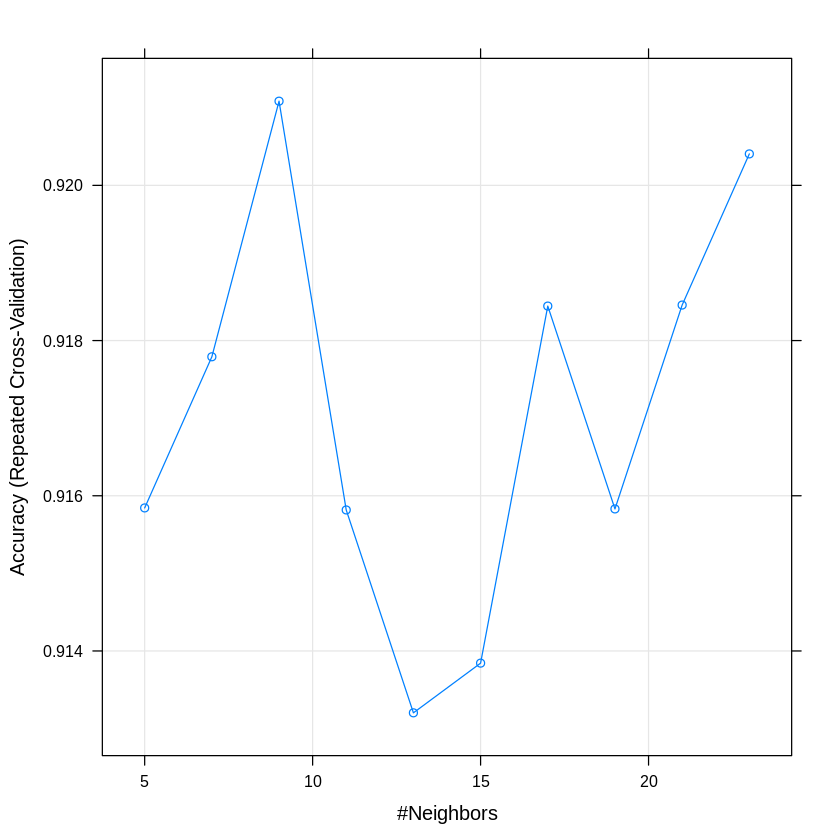

In [14]:
#1 knn: accuracy
ctrl <- trainControl(method = "repeatedcv",
                     number = 10,
                     repeats = 3)

set.seed(1234)
knnFit1_housing <- train(TrainDataHousing, TrainClassesHousing,
                 method = "knn",
                 preProcess = c("center", "scale"),
                 tuneLength = 10,
                 trControl = ctrl)
knnFit1_housing
plot(knnFit1_housing)
confusionMatrix(predict(knnFit1_housing),TrainClassesHousing)

#2 knn: AUC (ROC)
In this second example we specify the metric = "ROC" in the train function, to indicate that we want to optimize the area under the receiver operating characteristics curve. For this to work, we need to:
- add classProbs = TRUE to the trainControl function to indicate that the model should predict probabilities that an instance belongs to a certain class, rather than predicting the class itself, and 
- add summaryFunction = twoClassSummary to the trainControl function, such that caret automatically considers AUC, sensitivity, and specificity for each candidate model.

In [15]:
fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           ## Estimate class probabilities
                           classProbs = TRUE,
                           ## Evaluate performance using 
                           ## the following function
                           summaryFunction = twoClassSummary)
set.seed(1234)
knnFit2_housing <- train(TrainDataHousing, TrainClassesHousing,
                         method = "knn",
                         metric = "ROC",
                         preProcess = c("center", "scale"),
                         tuneLength = 10,
                         trControl = fitControl)
knnFit2_housing
## k = 7; ROC = 0.9558147; Sens = 0.7333333; Spec = 0.9563068
confusionMatrix(predict(knnFit2_housing),TrainClassesHousing)


k-Nearest Neighbors 

506 samples
 13 predictor
  2 classes: 'expensive', 'quite_cheap' 

Pre-processing: centered (12), scaled (12), ignore (1) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 455, 455, 455, 455, 455, 456, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec     
   5  0.9521552  0.7520833  0.9470377
   7  0.9572483  0.7377778  0.9548726
   9  0.9562006  0.7463889  0.9555869
  11  0.9536357  0.7166667  0.9570155
  13  0.9521867  0.6952778  0.9586932
  15  0.9514055  0.6909722  0.9594075
  17  0.9530348  0.6900000  0.9610742
  19  0.9532985  0.6887500  0.9620266
  21  0.9525747  0.6911111  0.9632060
  23  0.9527969  0.6900000  0.9648671

ROC was used to select the optimal model using the largest value.
The final value used for the model was k = 7.

Confusion Matrix and Statistics

             Reference
Prediction    expensive quite_cheap
  expensive          66          17
  quite_cheap        19         404
                                          
               Accuracy : 0.9289          
                 95% CI : (0.9029, 0.9497)
    No Information Rate : 0.832           
    P-Value [Acc > NIR] : 9.969e-11       
                                          
                  Kappa : 0.7431          
                                          
 Mcnemar's Test P-Value : 0.8676          
                                          
            Sensitivity : 0.7765          
            Specificity : 0.9596          
         Pos Pred Value : 0.7952          
         Neg Pred Value : 0.9551          
             Prevalence : 0.1680          
         Detection Rate : 0.1304          
   Detection Prevalence : 0.1640          
      Balanced Accuracy : 0.8680          
                                          
       'Positive' C

#3 knn: Sensitivity
In the same way as in example 2, we can change metric to "Sens", to make caret choose the model with the highest cross-validated sensitivity.

In [16]:
fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           ## Estimate class probabilities
                           classProbs = TRUE,
                           ## Evaluate performance using 
                           ## the following function
                           summaryFunction = twoClassSummary)
set.seed(1234)
knnFit3_housing <- train(TrainDataHousing, TrainClassesHousing,
                         method = "knn",
                         metric = "Sens",
                         preProcess = c("center", "scale"),
                         tuneLength = 10,
                         trControl = fitControl)
knnFit3_housing
confusionMatrix(predict(knnFit3_housing),TrainClassesHousing)

k-Nearest Neighbors 

506 samples
 13 predictor
  2 classes: 'expensive', 'quite_cheap' 

Pre-processing: centered (12), scaled (12), ignore (1) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 455, 455, 455, 455, 455, 456, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec     
   5  0.9521552  0.7520833  0.9470377
   7  0.9572483  0.7377778  0.9548726
   9  0.9562006  0.7463889  0.9555869
  11  0.9536357  0.7166667  0.9570155
  13  0.9521867  0.6952778  0.9586932
  15  0.9514055  0.6909722  0.9594075
  17  0.9530348  0.6900000  0.9610742
  19  0.9532985  0.6887500  0.9620266
  21  0.9525747  0.6911111  0.9632060
  23  0.9527969  0.6900000  0.9648671

Sens was used to select the optimal model using the largest value.
The final value used for the model was k = 5.

Confusion Matrix and Statistics

             Reference
Prediction    expensive quite_cheap
  expensive          69          17
  quite_cheap        16         404
                                          
               Accuracy : 0.9348          
                 95% CI : (0.9096, 0.9547)
    No Information Rate : 0.832           
    P-Value [Acc > NIR] : 4.69e-12        
                                          
                  Kappa : 0.7678          
                                          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.8118          
            Specificity : 0.9596          
         Pos Pred Value : 0.8023          
         Neg Pred Value : 0.9619          
             Prevalence : 0.1680          
         Detection Rate : 0.1364          
   Detection Prevalence : 0.1700          
      Balanced Accuracy : 0.8857          
                                          
       'Positive' C

#4 knn: Specificity
In the same way as in examples 2 and 3, we can change metric to "Spec", to make caret choose the model with the highest cross-validated specificity.

In [17]:
fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           ## Estimate class probabilities
                           classProbs = TRUE,
                           ## Evaluate performance using 
                           ## the following function
                           summaryFunction = twoClassSummary)
set.seed(1234)
knnFit4_housing <- train(TrainDataHousing, TrainClassesHousing,
                         method = "knn",
                         metric = "Spec",
                         preProcess = c("center", "scale"),
                         tuneLength = 10,
                         trControl = fitControl)
knnFit4_housing
confusionMatrix(predict(knnFit4_housing),TrainClassesHousing)

k-Nearest Neighbors 

506 samples
 13 predictor
  2 classes: 'expensive', 'quite_cheap' 

Pre-processing: centered (12), scaled (12), ignore (1) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 455, 455, 455, 455, 455, 456, ... 
Resampling results across tuning parameters:

  k   ROC        Sens       Spec     
   5  0.9521552  0.7520833  0.9470377
   7  0.9572483  0.7377778  0.9548726
   9  0.9562006  0.7463889  0.9555869
  11  0.9536357  0.7166667  0.9570155
  13  0.9521867  0.6952778  0.9586932
  15  0.9514055  0.6909722  0.9594075
  17  0.9530348  0.6900000  0.9610742
  19  0.9532985  0.6887500  0.9620266
  21  0.9525747  0.6911111  0.9632060
  23  0.9527969  0.6900000  0.9648671

Spec was used to select the optimal model using the largest value.
The final value used for the model was k = 23.

Confusion Matrix and Statistics

             Reference
Prediction    expensive quite_cheap
  expensive          60          15
  quite_cheap        25         406
                                          
               Accuracy : 0.9209          
                 95% CI : (0.8939, 0.9429)
    No Information Rate : 0.832           
    P-Value [Acc > NIR] : 3.914e-09       
                                          
                  Kappa : 0.7033          
                                          
 Mcnemar's Test P-Value : 0.1547          
                                          
            Sensitivity : 0.7059          
            Specificity : 0.9644          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.9420          
             Prevalence : 0.1680          
         Detection Rate : 0.1186          
   Detection Prevalence : 0.1482          
      Balanced Accuracy : 0.8351          
                                          
       'Positive' C

#User-defined metrics
So far, we have used metrics directly available in caret. From here on, we start defining our own metrics. To do this we work with a function that is taking data containing the predicted and the observed class for each instance, extracts the number of true negatives, false positives, false negatives and true positives from the table of this data, replaces NAs by zeros for each of these categories, and then uses these numbers to calculate a user-defined metric. 

In the example below, the user-defined metric is equal to (tn+tp)/(tn+fp+fn+tp), which is equivalent to the definition of accuracy. This number is therefore named 'acc' and we can use it to check whether our approach towards a user-defined metric works as it should.

In [34]:
### user-defined metric acc, leading to the same output as knnFit1_housing:
accSummary <- function (data, lev = NULL, model = NULL) {
        tn <- table(data$pred == "expensive",data$obs=='expensive')[1]
        fp <- table(data$pred == "expensive",data$obs=='expensive')[2]
        fn <- table(data$pred == "expensive",data$obs=='expensive')[3]
        tp <- table(data$pred == "expensive",data$obs=='expensive')[4]
        if(is.na(tp)){tp <- 0}
        if(is.na(fn)){fn <- 0}
        if(is.na(fp)){fp <- 0}
        if(is.na(tn)){tn <- 0}
        out <- (tn+tp)/(tn+fp+fn+tp)
        names(out) <- "acc"
        out
}

#5 knn: user-defined accuracy
Below, we use the same code as we did in the previous examples, but now allocate the user-defined accSummary (which was defined in the previous code block) to summaryFunction in trainControl, and we change the metric to "acc". We see that we indeed get the same output as in example 1.

In [20]:
fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           ## Estimate class probabilities
                           classProbs = TRUE,
                           ## Evaluate performance using 
                           ## the following function
                           summaryFunction = accSummary)
set.seed(1234)
knnFit5_housing <- train(TrainDataHousing, TrainClassesHousing,
                         method = "knn",
                         metric = "acc",
                         preProcess = c("center", "scale"),
                         tuneLength = 10,
                         trControl = fitControl)
knnFit5_housing
## k = 9; acc = 0.9223884; 
confusionMatrix(predict(knnFit5_housing),TrainClassesHousing)

k-Nearest Neighbors 

506 samples
 13 predictor
  2 classes: 'expensive', 'quite_cheap' 

Pre-processing: centered (12), scaled (12), ignore (1) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 455, 455, 455, 455, 455, 456, ... 
Resampling results across tuning parameters:

  k   acc      
   5  0.9144451
   7  0.9185824
   9  0.9205587
  11  0.9168136
  13  0.9146486
  15  0.9144641
  17  0.9156563
  19  0.9162602
  21  0.9176561
  23  0.9188365

acc was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

Confusion Matrix and Statistics

             Reference
Prediction    expensive quite_cheap
  expensive          65          16
  quite_cheap        20         405
                                          
               Accuracy : 0.9289          
                 95% CI : (0.9029, 0.9497)
    No Information Rate : 0.832           
    P-Value [Acc > NIR] : 9.969e-11       
                                          
                  Kappa : 0.7406          
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.7647          
            Specificity : 0.9620          
         Pos Pred Value : 0.8025          
         Neg Pred Value : 0.9529          
             Prevalence : 0.1680          
         Detection Rate : 0.1285          
   Detection Prevalence : 0.1601          
      Balanced Accuracy : 0.8634          
                                          
       'Positive' C

#6 knn: Positive Predictive Value
Our example here is identical to the previous example, but now we define our metric as (tp)/(fp+tp), which is the definition of positive predictive value, and give it the name "ppv", which we then choose as the metric to optimize over in the function train.

In [44]:
#6 knn: custom metric ppv
ppvSummary <- function (data, lev = NULL, model = NULL) {
        tn <- table(data$pred == "expensive",data$obs=='expensive')[1]
        fp <- table(data$pred == "expensive",data$obs=='expensive')[2]
        fn <- table(data$pred == "expensive",data$obs=='expensive')[3]
        tp <- table(data$pred == "expensive",data$obs=='expensive')[4]
        if(is.na(tp)){tp <- 0}
        if(is.na(fn)){fn <- 0}
        if(is.na(fp)){fp <- 0}
        if(is.na(tn)){tn <- 0}
        out <- (tp)/(fp+tp)
        names(out) <- "ppv"
        out
}

In [46]:
fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           ## Estimate class probabilities
                           classProbs = TRUE,
                           ## Evaluate performance using 
                           ## the following function
                           summaryFunction = ppvSummary)
set.seed(1234)
knnFit6_housing <- train(TrainDataHousing, TrainClassesHousing,
                         method = "knn",
                         metric = "ppv",
                         preProcess = c("center", "scale"),
                         tuneLength = 10,
                         trControl = fitControl)
knnFit6_housing
confusionMatrix(predict(knnFit6_housing),TrainClassesHousing)

k-Nearest Neighbors 

506 samples
 13 predictor
  2 classes: 'expensive', 'quite_cheap' 

Pre-processing: centered (12), scaled (12), ignore (1) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 455, 455, 455, 455, 455, 456, ... 
Resampling results across tuning parameters:

  k   ppv      
   5  0.7485789
   7  0.7748989
   9  0.7813300
  11  0.7792374
  13  0.7809870
  15  0.7837835
  17  0.7898997
  19  0.7938016
  21  0.7991230
  23  0.8047421

ppv was used to select the optimal model using the largest value.
The final value used for the model was k = 23.

Confusion Matrix and Statistics

             Reference
Prediction    expensive quite_cheap
  expensive          60          15
  quite_cheap        25         406
                                          
               Accuracy : 0.9209          
                 95% CI : (0.8939, 0.9429)
    No Information Rate : 0.832           
    P-Value [Acc > NIR] : 3.914e-09       
                                          
                  Kappa : 0.7033          
                                          
 Mcnemar's Test P-Value : 0.1547          
                                          
            Sensitivity : 0.7059          
            Specificity : 0.9644          
         Pos Pred Value : 0.8000          
         Neg Pred Value : 0.9420          
             Prevalence : 0.1680          
         Detection Rate : 0.1186          
   Detection Prevalence : 0.1482          
      Balanced Accuracy : 0.8351          
                                          
       'Positive' C

#6a knn: Positive Predictive Value (continued)
As we see that positive predictive value is highest for the highest hyperparameter value k considered, we rerun the analysis using a grid of k-values that are higher than in the previous example.

In [47]:
### again, with larger values of K:
grid <- expand.grid(k = seq(1:30)+20)

set.seed(1234)
knnFit6a_housing <- train(TrainDataHousing, TrainClassesHousing,
                         method = "knn",
                         metric = "ppv",
                         preProcess = c("center", "scale"),
                         tuneLength = 10,
                         trControl = fitControl,
                         tuneGrid = grid)
knnFit6a_housing
## k = 35; ppv = 0.8494116; 
confusionMatrix(predict(knnFit6a_housing),TrainClassesHousing)

k-Nearest Neighbors 

506 samples
 13 predictor
  2 classes: 'expensive', 'quite_cheap' 

Pre-processing: centered (12), scaled (12), ignore (1) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 455, 455, 455, 455, 455, 456, ... 
Resampling results across tuning parameters:

  k   ppv      
  21  0.7991230
  22  0.7982680
  23  0.8047421
  24  0.8040938
  25  0.8149430
  26  0.8172078
  27  0.8228745
  28  0.8272370
  29  0.8301721
  30  0.8291136
  31  0.8332915
  32  0.8328640
  33  0.8318918
  34  0.8332320
  35  0.8325029
  36  0.8315238
  37  0.8323175
  38  0.8357460
  39  0.8344722
  40  0.8330902
  41  0.8316299
  42  0.8349960
  43  0.8328175
  44  0.8395714
  45  0.8419794
  46  0.8440675
  47  0.8421706
  48  0.8430198
  49  0.8437937
  50  0.8438373

ppv was used to select the optimal model using the largest value.
The final value used for the model was k = 46.

Confusion Matrix and Statistics

             Reference
Prediction    expensive quite_cheap
  expensive          53          11
  quite_cheap        32         410
                                          
               Accuracy : 0.915           
                 95% CI : (0.8872, 0.9378)
    No Information Rate : 0.832           
    P-Value [Acc > NIR] : 4.641e-08       
                                          
                  Kappa : 0.6627          
                                          
 Mcnemar's Test P-Value : 0.002289        
                                          
            Sensitivity : 0.6235          
            Specificity : 0.9739          
         Pos Pred Value : 0.8281          
         Neg Pred Value : 0.9276          
             Prevalence : 0.1680          
         Detection Rate : 0.1047          
   Detection Prevalence : 0.1265          
      Balanced Accuracy : 0.7987          
                                          
       'Positive' C

# 7 knn: F1-score
The next metric we consider is the so-called F1-score, which is equal to 2* precision * recall / (precision + recall)

In [49]:
f1Summary <- function (data, lev = NULL, model = NULL) {
        tn <- table(data$pred == "expensive",data$obs=='expensive')[1]
        fp <- table(data$pred == "expensive",data$obs=='expensive')[2]
        fn <- table(data$pred == "expensive",data$obs=='expensive')[3]
        tp <- table(data$pred == "expensive",data$obs=='expensive')[4]
        if(is.na(tp)){tp <- 0}
        if(is.na(fn)){fn <- 0}
        if(is.na(fp)){fp <- 0}
        if(is.na(tn)){tn <- 0}
        out <- (2*tp/(tp+fp)*(tp/(tp+fn)))/(tp/(tp+fp) + (tp/(tp+fn)))
        names(out) <- "f1"
        out
}

In [50]:
fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           ## Estimate class probabilities
                           classProbs = TRUE,
                           ## Evaluate performance using 
                           ## the following function
                           summaryFunction = f1Summary)
set.seed(1234)
knnFit7_housing <- train(TrainDataHousing, TrainClassesHousing,
                         method = "knn",
                         metric = "f1",
                         preProcess = c("center", "scale"),
                         tuneLength = 10,
                         trControl = fitControl)
knnFit7_housing
confusionMatrix(predict(knnFit7_housing),TrainClassesHousing)


k-Nearest Neighbors 

506 samples
 13 predictor
  2 classes: 'expensive', 'quite_cheap' 

Pre-processing: centered (12), scaled (12), ignore (1) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 455, 455, 455, 455, 455, 456, ... 
Resampling results across tuning parameters:

  k   f1       
   5  0.7432560
   7  0.7471008
   9  0.7549875
  11  0.7379475
  13  0.7270166
  15  0.7257174
  17  0.7278599
  19  0.7288822
  21  0.7323964
  23  0.7342341

f1 was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

Confusion Matrix and Statistics

             Reference
Prediction    expensive quite_cheap
  expensive          65          16
  quite_cheap        20         405
                                          
               Accuracy : 0.9289          
                 95% CI : (0.9029, 0.9497)
    No Information Rate : 0.832           
    P-Value [Acc > NIR] : 9.969e-11       
                                          
                  Kappa : 0.7406          
                                          
 Mcnemar's Test P-Value : 0.6171          
                                          
            Sensitivity : 0.7647          
            Specificity : 0.9620          
         Pos Pred Value : 0.8025          
         Neg Pred Value : 0.9529          
             Prevalence : 0.1680          
         Detection Rate : 0.1285          
   Detection Prevalence : 0.1601          
      Balanced Accuracy : 0.8634          
                                          
       'Positive' C

#8 knn: weighted average between precision and recall

The F1-score gives equal weight to both precision and recall. We can also use a weighted average of precision and recall, as is done in the example below, with most weight placed on precision.

In [53]:
ppv_recSummary <- function (data, lev = NULL, model = NULL) {
        tn <- table(data$pred == "expensive",data$obs=='expensive')[1]
        fp <- table(data$pred == "expensive",data$obs=='expensive')[2]
        fn <- table(data$pred == "expensive",data$obs=='expensive')[3]
        tp <- table(data$pred == "expensive",data$obs=='expensive')[4]
        if(is.na(tp)){tp <- 0}
        if(is.na(fn)){fn <- 0}
        if(is.na(fp)){fp <- 0}
        if(is.na(tn)){tn <- 0}
        out <- (5*tp/(tp+fp)+(tp/(tp+fn)))/6
        names(out) <- "ppv_rec"
        out
}

In [55]:
fitControl <- trainControl(method = "repeatedcv",
                           number = 10,
                           repeats = 10,
                           ## Estimate class probabilities
                           classProbs = TRUE,
                           ## Evaluate performance using 
                           ## the following function
                           summaryFunction = ppv_recSummary)
set.seed(1234)
knnFit8_housing <- train(TrainDataHousing, TrainClassesHousing,
                         method = "knn",
                         metric = "ppv_rec",
                         preProcess = c("center", "scale"),
                         tuneLength = 25,
                         trControl = fitControl)
knnFit8_housing
confusionMatrix(predict(knnFit8_housing),TrainClassesHousing)

k-Nearest Neighbors 

506 samples
 13 predictor
  2 classes: 'expensive', 'quite_cheap' 

Pre-processing: centered (12), scaled (12), ignore (1) 
Resampling: Cross-Validated (10 fold, repeated 10 times) 
Summary of sample sizes: 455, 455, 455, 455, 455, 456, ... 
Resampling results across tuning parameters:

  k   ppv_rec  
   5  0.7491630
   7  0.7687121
   9  0.7755065
  11  0.7688089
  13  0.7667021
  15  0.7683150
  17  0.7738318
  19  0.7762930
  21  0.7811210
  23  0.7856184
  25  0.7939108
  27  0.7993630
  29  0.8050508
  31  0.8062151
  33  0.8034978
  35  0.8027802
  37  0.8016766
  39  0.8011574
  41  0.7972147
  43  0.7980192
  45  0.8043347
  47  0.8006283
  49  0.7993419
  51  0.7985483
  53  0.7936673

ppv_rec was used to select the optimal model using the largest value.
The final value used for the model was k = 31.

Confusion Matrix and Statistics

             Reference
Prediction    expensive quite_cheap
  expensive          58          12
  quite_cheap        27         409
                                          
               Accuracy : 0.9229          
                 95% CI : (0.8961, 0.9446)
    No Information Rate : 0.832           
    P-Value [Acc > NIR] : 1.63e-09        
                                          
                  Kappa : 0.7034          
                                          
 Mcnemar's Test P-Value : 0.02497         
                                          
            Sensitivity : 0.6824          
            Specificity : 0.9715          
         Pos Pred Value : 0.8286          
         Neg Pred Value : 0.9381          
             Prevalence : 0.1680          
         Detection Rate : 0.1146          
   Detection Prevalence : 0.1383          
      Balanced Accuracy : 0.8269          
                                          
       'Positive' C

#To Conclude
In your data science project, you should carefully consider what performance metric best captures what you are trying to achieve with your algorithm. In this notebook, you find example code that will help you defining exactly the metric you want to optimize over.